In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#data loading 
data=pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
#dependent and independent feature 
X=data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y=data['Price']

In [4]:
#training testing and spliting data into  30 percent test data and remaining training data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
#Normalisation/Scaling of X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Go through StandardScaler and MinMax Scaler
X_train = scaler.fit_transform(X_train) #fits the preprocessing transformer to the training data and then transforms the training datausing learned parameters
X_test = scaler.transform(X_test)#transform() is a method that applies a learned preprocessing transformation to a new data.Assumption is done that the preprocessing transformer has already been learned using the trained data , and this simply applies the learned transformation to the new data
#Linear Regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)

In [6]:
y_pred

array([1308536.13592601, 1237122.72746459, 1243835.62817083, ...,
       1457119.79297222, 1483428.953093  , 1047510.59737207])

In [7]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3563    1.348222e+06
1538    1.309937e+06
1837    1.472887e+06
2380    1.409762e+06
1912    1.009606e+06
Name: Price, Length: 1500, dtype: float64

In [8]:
pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})

,Actual Price,Predicted Price
1501,1.339096e+06,1.308536e+06
2586,1.251794e+06,1.237123e+06
2653,1.340095e+06,1.243836e+06
1055,1.431508e+06,1.229242e+06
705,1.042374e+06,1.059353e+06
...,...,...
3563,1.348222e+06,1.437325e+06
1538,1.309937e+06,1.094962e+06
1837,1.472887e+06,1.457120e+06
2380,1.409762e+06,1.483429e+06


In [10]:
#r square,residual error 
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.9146818498754016

In [11]:
# model coefficient: m
model.coef_
#y=m1X1 + m2X2 + m3X3 + m4X4 + m5X5 + c (five independent features X giving five coefficents , c is constant)

array([232679.72464304, 163841.04659288, 121110.55547764,   2892.81511895,
       151252.34237708])

In [12]:
#model intercept: c
model.intercept_
#y=m1X1 + m2X2 + m3X3 + m4X4 + m5X5 + c (five independent features X giving five coefficents , c is constant)

1228219.1492415662

In [21]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score
mse=cross_val_score(model,X_train,y_train,scoring='neg_root_mean_squared_error',cv=5)
mse

array([-100963.46859126, -104627.10898483, -100324.58204896,
       -103314.97570997,  -98567.7701886 ])

In [22]:
np.mean(mse)

-101559.58110472365

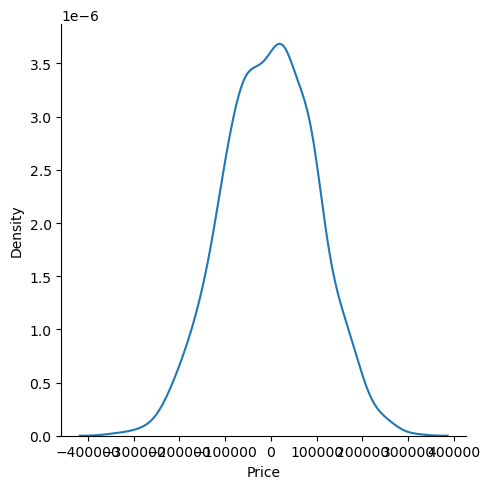

In [23]:
#plotting the price density
import seaborn as sb
sb.displot(y_pred-y_test,kind='kde')